In [3]:
#importing necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,auc,classification_report,roc_curve,roc_auc_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency




In [4]:
#Setting plot configurations
%matplotlib inline
rcParams['figure.figsize']= 5,4
sns.set_style('whitegrid')

In [5]:
#loading the file
df= pd.read_csv('phising.csv')
print(df.shape)
df.head()


(11055, 31)


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [6]:
#performing basic checks
print(df.isnull().sum())
print(df.info())


having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

 1    6157
-1    4898
Name: Result, dtype: int64


C:\Users\Lenono\anaconda3\envs\Phising_Classifier\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


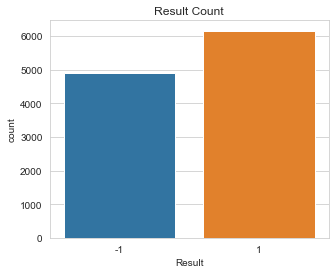

In [7]:
print(df.Result.value_counts())
sns.countplot(df.Result)
plt.title("Result Count")
plt.show()

No null values detected. However dtype of columns are  continous. There is an imbalance between the majority and minoriy classes

**EDA**

C:\Users\Lenono\anaconda3\envs\Phising_Classifier\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Lenono\anaconda3\envs\Phising_Classifier\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Lenono\anaconda3\envs\Phising_Classifier\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an err

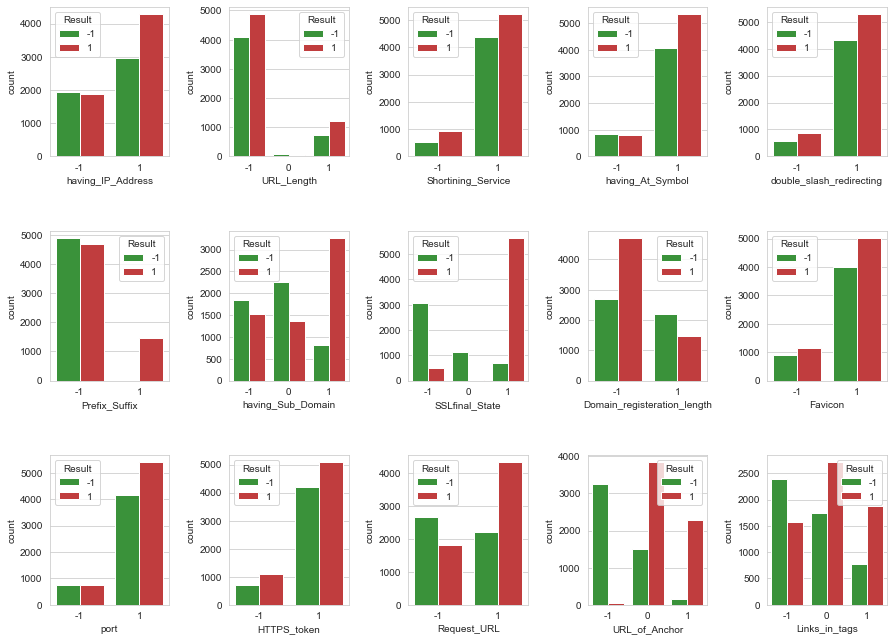

In [8]:
#Countplots for first 15 features
rcParams['figure.figsize'] = 15,11 #rcParameters run configuration parameters
c_palette = ['tab:green', 'tab:red']

f,ax=plt.subplots(3,5)
sns.countplot('having_IP_Address',hue='Result',data=df,ax=ax[0,0],palette=c_palette)
sns.countplot('URL_Length',hue='Result',data=df,ax=ax[0,1],palette=c_palette)
sns.countplot('Shortining_Service',hue='Result',data=df,ax=ax[0,2],palette=c_palette)
sns.countplot('having_At_Symbol',hue='Result',data=df,ax=ax[0,3],palette=c_palette)
sns.countplot('double_slash_redirecting',hue='Result',data=df,ax=ax[0,4],palette=c_palette)
sns.countplot('Prefix_Suffix',hue='Result',data=df,ax=ax[1,0],palette=c_palette)
sns.countplot('having_Sub_Domain',hue='Result',data=df,ax=ax[1,1],palette=c_palette)
sns.countplot('SSLfinal_State',hue='Result',data=df,ax=ax[1,2],palette=c_palette)
sns.countplot('Domain_registeration_length',hue='Result',data=df,ax=ax[1,3],palette=c_palette)
sns.countplot('Favicon',hue='Result',data=df,ax=ax[1,4],palette=c_palette)
sns.countplot('port',hue='Result',data=df,ax=ax[2,0],palette=c_palette)
sns.countplot('HTTPS_token',hue='Result',data=df,ax=ax[2,1],palette=c_palette)
sns.countplot('Request_URL',hue='Result',data=df,ax=ax[2,2],palette=c_palette)
sns.countplot('URL_of_Anchor',hue='Result',data=df,ax=ax[2,3],palette=c_palette)
sns.countplot('Links_in_tags',hue='Result',data=df,ax=ax[2,4],palette=c_palette)
plt.subplots_adjust(wspace=0.5,hspace=0.5)

plt.show()

C:\Users\Lenono\anaconda3\envs\Phising_Classifier\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Lenono\anaconda3\envs\Phising_Classifier\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Lenono\anaconda3\envs\Phising_Classifier\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an err

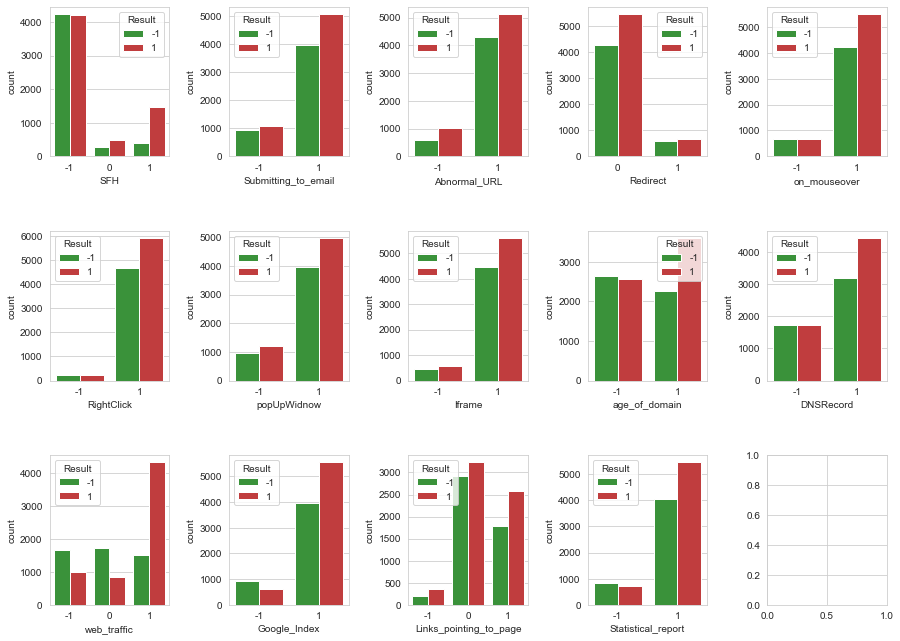

In [10]:
#countplot for rest of the features
f,ax=plt.subplots(3,5)
sns.countplot('SFH',hue='Result',data=df,ax=ax[0,0],palette=c_palette)
sns.countplot('Submitting_to_email',hue='Result',data=df,ax=ax[0,1],palette=c_palette)
sns.countplot('Abnormal_URL',hue='Result',data=df,ax=ax[0,2],palette=c_palette)
sns.countplot('Redirect',hue='Result',data=df,ax=ax[0,3],palette=c_palette)
sns.countplot('on_mouseover',hue='Result',data=df,ax=ax[0,4],palette=c_palette)
sns.countplot('RightClick',hue='Result',data=df,ax=ax[1,0],palette=c_palette)
sns.countplot('popUpWidnow',hue='Result',data=df,ax=ax[1,1],palette=c_palette)
sns.countplot('Iframe',hue='Result',data=df,ax=ax[1,2],palette=c_palette)
sns.countplot('age_of_domain',hue='Result',data=df,ax=ax[1,3],palette=c_palette)
sns.countplot('DNSRecord',hue='Result',data=df,ax=ax[1,4],palette=c_palette)
sns.countplot('web_traffic',hue='Result',data=df,ax=ax[2,0],palette=c_palette)
sns.countplot('Google_Index',hue='Result',data=df,ax=ax[2,1],palette=c_palette)
sns.countplot('Links_pointing_to_page',hue='Result',data=df,ax=ax[2,2],palette=c_palette)
sns.countplot('Statistical_report',hue='Result',data=df,ax=ax[2,3],palette=c_palette)

plt.subplots_adjust(wspace=0.5,hspace=0.5)

plt.show()

**Chi-Squared test**


In [11]:

df1=df.apply(LabelEncoder().fit_transform)#to remove negative values


In [12]:
# testing the relationship between Result

cols=df1.drop('Result',axis=1)
chi2_check = []
for i in cols:
    if chi2_contingency(pd.crosstab(df['Result'], df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(chi2_check,index=cols.columns)

print(res)

                                                          0
having_IP_Address                    Reject Null Hypothesis
URL_Length                           Reject Null Hypothesis
Shortining_Service                   Reject Null Hypothesis
having_At_Symbol                     Reject Null Hypothesis
double_slash_redirecting             Reject Null Hypothesis
Prefix_Suffix                        Reject Null Hypothesis
having_Sub_Domain                    Reject Null Hypothesis
SSLfinal_State                       Reject Null Hypothesis
Domain_registeration_length          Reject Null Hypothesis
Favicon                      Fail to Reject Null Hypothesis
port                                 Reject Null Hypothesis
HTTPS_token                          Reject Null Hypothesis
Request_URL                          Reject Null Hypothesis
URL_of_Anchor                        Reject Null Hypothesis
Links_in_tags                        Reject Null Hypothesis
SFH                                  Rej

In [13]:
#drop non related features
df.drop(columns=['Statistical_report','Iframe','popUpWidnow',
         'on_mouseover','Submitting_to_email',
         'HTTPS_token','port','Favicon','having_At_Symbol'],
        axis=1,inplace=True)

In [14]:
X= df.iloc[:,:-1].astype(object)
y=df['Result']

In [ ]:
X.head(5)

In [15]:

kfold = KFold(n_splits=10, random_state=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=1),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

C:\Users\Lenono\anaconda3\envs\Phising_Classifier\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


,CV Mean,Std
Svm,0.947083,0.007693
Logistic Regression,0.926005,0.007268
KNN,0.956121,0.018402
Decision Tree,0.961459,0.017515
Naive Bayes,0.601086,0.012935
Random Forest,0.969693,0.009873


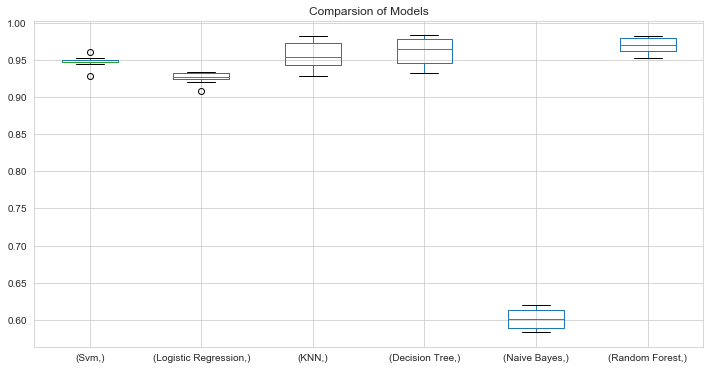

In [16]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()
plt.title("Comparsion of Models")
plt.show()

In [17]:
pca = PCA()
X = pd.DataFrame(pca.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.240857,2.790134,-2.460660,-0.651789,0.170625,0.349632,-0.475998,-0.667330,1.257793,0.864782,...,-0.219467,0.138482,0.353048,0.675946,0.894278,-0.063213,-0.541114,0.501641,-1.250294,-0.987347
1,0.658318,-0.224639,-1.080069,-0.999167,-0.988480,0.746357,-0.188653,-0.085084,-1.176667,0.930242,...,-0.242841,-0.316790,0.068591,1.347992,1.088595,-0.118375,-0.210533,-0.260355,-0.101061,-0.053715
2,0.453251,0.686791,-0.873488,-2.215446,0.123773,-0.202833,1.087286,0.707612,-0.341302,0.124591,...,0.889354,0.593509,-0.020307,-0.253006,0.723389,0.024207,-0.529978,1.448838,-0.125124,0.012569
3,-2.059316,0.237690,-0.112323,-0.905261,-1.232791,0.668653,1.176992,-0.143339,0.517313,-0.129502,...,0.390874,0.737615,0.021002,0.586084,0.649596,1.406424,0.460842,0.385251,-0.024130,0.019499
4,1.083504,0.571745,-0.557610,-0.633726,-1.366600,0.336196,-1.236697,-0.080389,-0.515733,0.103772,...,-0.135934,-0.215368,0.118408,0.961872,0.650594,-0.154942,0.021585,-0.872449,1.398305,0.297530


In [18]:
X=X.iloc[:,:-8]#Dropped the last 8 columns

In [19]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=10,test_size=0.2)

In [20]:
#balance training data
smote=SMOTE(random_state=10)
X_train_smote,y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)
X_train_smote=pd.DataFrame(X_train_smote,columns=X_train.columns)

In [21]:
parameters={'bootstrap': [True],
            'max_depth': [49,50,51],
            'max_features': ['auto'],
            'min_samples_leaf': [1],
            'min_samples_split': [3],
            'n_estimators': [800]}
grid1=GridSearchCV(RandomForestClassifier(random_state=10),parameters,verbose=3)
grid1.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] bootstrap=True, max_depth=49, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=49, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800, score=0.952, total=  12.5s
[CV] bootstrap=True, max_depth=49, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.4s remaining:    0.0s


[CV]  bootstrap=True, max_depth=49, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800, score=0.963, total=  12.7s
[CV] bootstrap=True, max_depth=49, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.1s remaining:    0.0s


[CV]  bootstrap=True, max_depth=49, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800, score=0.960, total=  12.6s
[CV] bootstrap=True, max_depth=49, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800 
[CV]  bootstrap=True, max_depth=49, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800, score=0.960, total=  13.8s
[CV] bootstrap=True, max_depth=49, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800 
[CV]  bootstrap=True, max_depth=49, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800, score=0.959, total=  12.9s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=800, score=0.952, total=  13.2s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=10,
                               

In [22]:
grid1.best_params_

{'bootstrap': True,
 'max_depth': 49,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 800}

In [23]:
params={'leaf_size':[1,10,50],
        'n_neighbors':[1,4,5],
         'p':[1,2]}
grid2=GridSearchCV(KNeighborsClassifier(),params,verbose=3)
grid2.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] leaf_size=1, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=1, score=0.952, total=   0.1s
[CV] leaf_size=1, n_neighbors=1, p=1 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..... leaf_size=1, n_neighbors=1, p=1, score=0.953, total=   0.1s
[CV] leaf_size=1, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=1, score=0.953, total=   0.1s
[CV] leaf_size=1, n_neighbors=1, p=1 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ..... leaf_size=1, n_neighbors=1, p=1, score=0.955, total=   0.1s
[CV] leaf_size=1, n_neighbors=1, p=1 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=1, score=0.961, total=   0.1s
[CV] leaf_size=1, n_neighbors=1, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=2, score=0.950, total=   0.2s
[CV] leaf_size=1, n_neighbors=1, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=2, score=0.951, total=   0.2s
[CV] leaf_size=1, n_neighbors=1, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=2, score=0.953, total=   0.2s
[CV] leaf_size=1, n_neighbors=1, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=2, score=0.953, total=   0.2s
[CV] leaf_size=1, n_neighbors=1, p=2 .................................
[CV] ..... leaf_size=1, n_neighbors=1, p=2, score=0.960, total=   0.1s
[CV] leaf_size=1, n_neighbors=4, p=1 .................................
[CV] .

[CV] .... leaf_size=50, n_neighbors=1, p=1, score=0.955, total=   0.1s
[CV] leaf_size=50, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=50, n_neighbors=1, p=1, score=0.958, total=   0.1s
[CV] leaf_size=50, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=50, n_neighbors=1, p=1, score=0.955, total=   0.1s
[CV] leaf_size=50, n_neighbors=1, p=1 ................................
[CV] .... leaf_size=50, n_neighbors=1, p=1, score=0.958, total=   0.1s
[CV] leaf_size=50, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=50, n_neighbors=1, p=2, score=0.948, total=   0.1s
[CV] leaf_size=50, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=50, n_neighbors=1, p=2, score=0.953, total=   0.1s
[CV] leaf_size=50, n_neighbors=1, p=2 ................................
[CV] .... leaf_size=50, n_neighbors=1, p=2, score=0.957, total=   0.1s
[CV] leaf_size=50, n_neighbors=1, p=2 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   17.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [1, 10, 50], 'n_neighbors': [1, 4, 5],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [24]:
grid2.best_params_

{'leaf_size': 50, 'n_neighbors': 1, 'p': 1}

In [25]:
model1=RandomForestClassifier(bootstrap=True,
                             random_state=10,                                                     
                             max_depth=49,
                             n_estimators=800,
                             max_features='auto',
                             min_samples_split=3,
                             min_samples_leaf=1)
model1.fit(X_train_smote,y_train_smote)
yhat=model1.predict(X_test)
ytr=model1.predict(X_train_smote)

In [26]:

print("Training accuracy",accuracy_score(y_train_smote,ytr))
print("Testing accuracy",accuracy_score(y_test,yhat))

Training accuracy 0.98797636030161
Testing accuracy 0.9624604251469923


In [27]:
print(pd.crosstab(y_test,yhat))
print("\n")
print(classification_report(y_test,yhat))

col_0    -1     1
Result           
-1      915    46
 1       37  1213


              precision    recall  f1-score   support

          -1       0.96      0.95      0.96       961
           1       0.96      0.97      0.97      1250

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



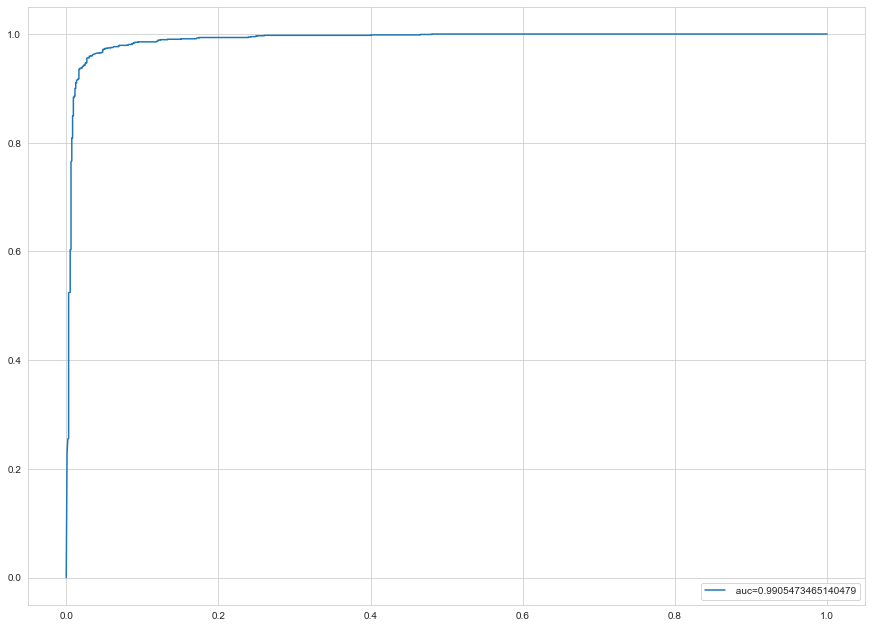

In [28]:
#plotting Roc curve
y_proba = model1.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.plot(fpr,tpr,label=" auc="+str(auc))
rcParams['figure.figsize'] = 3,2
plt.legend(loc=4)
plt.show()

In [29]:
import pickle

In [30]:
pickle.dump(model1, open('model.pkl','wb'))

In [ ]:
model_pred= pickle.load(open('model.pkl','rb'))
print(model_pred.predict([[]]))